# Final Seminario 2 - Intro ML: Dic 2024

Se pide evaluar comparativamente el desempeño de 2 modelos de regrasión lineal, que son entrenados con el mismo conjunto de datos. Para ello se pide seguir seguir las notas, donde se realizará lo siquiente:

* dividir conjuntos de datos en conjuntos de entrenamiento, validación cruzada y prueba
* entrenar 2 modelos de regresión, habiendo previamente
* agregado características polinomiales de 2do y 3er grado
* escalado de características


## Importaciones

In [ ]:
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)


## Regresión

Primero, desarrollemos un modelo de regresión. A continuación, se proporciona el conjunto de datos a continuación, que consiste en 50 ejemplos de una característica de entrada `x` y su correspondiente objetivo `y`.

In [10]:
# Load the dataset from the text file
data = np.loadtxt('data_ex1.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")

the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


Graficamos el conjunto de datos ...

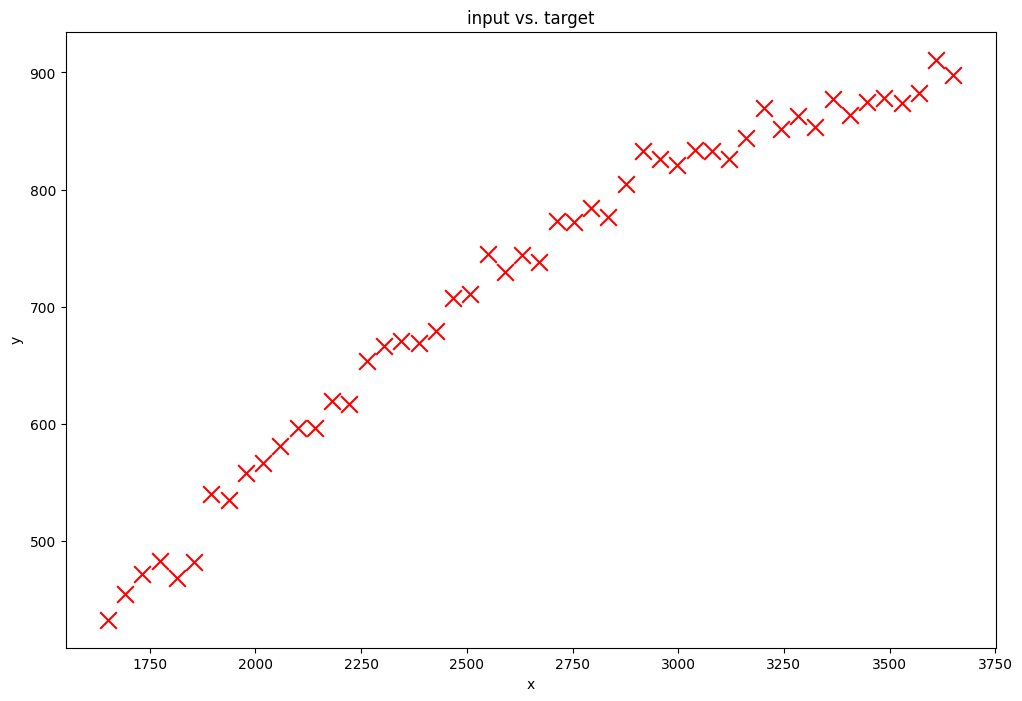

In [12]:
import matplotlib.pyplot as plt

# Plot the entire dataset
def plot_dataset(x, y, title):
    plt.rcParams["figure.figsize"] = (12,8)
    plt.rcParams["lines.markersize"] = 12
    plt.scatter(x, y, marker='x', c='r'); 
    plt.title(title)
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.show()

plot_dataset(x=x, y=y, title="input vs. target")

## Datos de entrenamiento, validación cruzada y prueba

En los laboratorios anteriores, podrías haber utilizado todo el conjunto de datos para entrenar tus modelos. Sin embargo, en la práctica, es mejor reservar una parte de los datos para medir qué tan bien tu modelo generaliza a nuevos ejemplos. Esto te permitirá saber si el modelo ha sobreajustado a tu conjunto de entrenamiento.

Se pide dividir los datos en tres partes:

* ***conjunto de entrenamiento (training set)*** - utilizado para entrenar el modelo
* ***conjunto de validación cruzada (cross validation, también llamado conjunto de validación, desarrollo o dev)*** - utilizado para evaluar las diferentes configuraciones del modelo que estás eligiendo. Por ejemplo, puedes usarlo para tomar decisiones sobre qué características polinomiales agregar a tu conjunto de datos.
* ***conjunto de prueba (test set)*** - utilizado para dar una estimación justa del rendimiento de tu modelo.

Utiliza la función de Scikit-learn [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para dividir tus datos en un 60% para entrenamiento, 20% para validación cruzada y 20% para prueba.

In [13]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"la forma del training set (input) es: {x_train.shape}")
print(f"la forma del training set (target) es: {y_train.shape}\n")
print(f"la forma del cross validation set (input) es: {x_cv.shape}")
print(f"la forma del cross validation set (target) es: {y_cv.shape}\n")
print(f"la forma del test set (input) es: {x_test.shape}")
print(f"la forma del test set (target) es: {y_test.shape}")

la forma del training set (input) es: (30, 1)
la forma del training set (target) es: (30, 1)

la forma del cross validation set (input) es: (10, 1)
la forma del cross validation set (target) es: (10, 1)

la forma del test set (input) es: (10, 1)
la forma del test set (target) es: (10, 1)


Grafiquemos nuevamente el conjunto de datos dividios como datos de entrenamiento, validación cruzada o prueba.

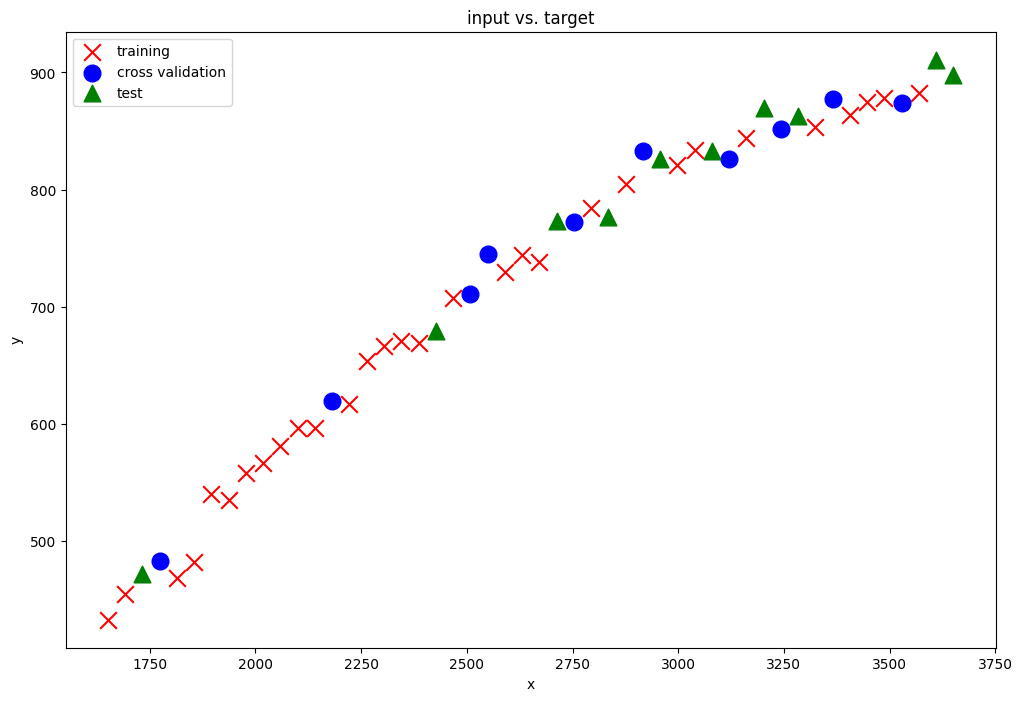

In [14]:
def plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title):
    plt.scatter(x_train, y_train, marker='x', c='r', label='training'); 
    plt.scatter(x_cv, y_cv, marker='o', c='b', label='cross validation'); 
    plt.scatter(x_test, y_test, marker='^', c='g', label='test'); 
    plt.title("input vs. target")
    plt.xlabel("x"); 
    plt.ylabel("y"); 
    plt.legend()
    plt.show()


plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

## Modelo lineal

### Escalado de características

Usarás el escalado de características mediante la clase [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de scikit-learn. Esta clase calcula el valor z-score de tus entradas. Como recordatorio, el valor z-score corresponde a la siguiente ecuación:

$$ z = \frac{x - \mu}{\sigma} $$

donde $\mu$ es la media de los valores de la característica y $\sigma$ es la desviación estándar.

Media del training set: 2504.06
Desvio estandar del training set: 574.85


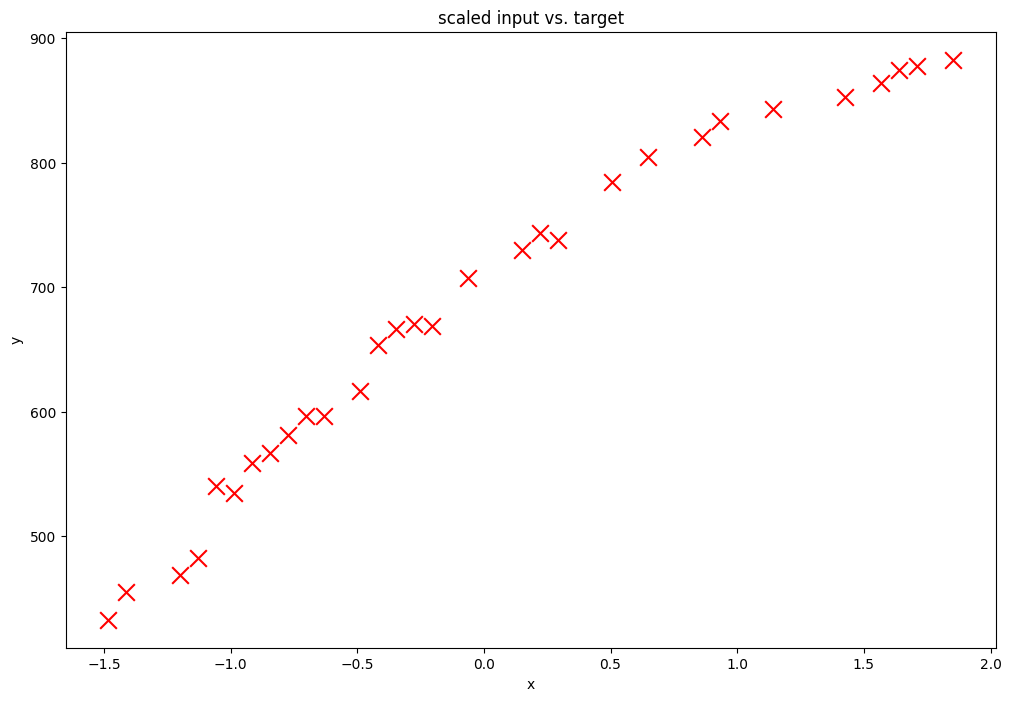

In [15]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Media del training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Desvio estandar del training set: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

### Entrenar el modelo

A continuación, crearás y entrenarás un modelo de regresión. Para este laboratorio, utilizarás la clase [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), pero ten en cuenta que hay otros [regresores lineales](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors) que también puedes utilizar.

In [7]:
# Initialize the class
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

### Evaluar el Modelo

Para evaluar el rendimiento de tu modelo, medirás el error para los conjuntos de entrenamiento y validación cruzada. 

Para el error de entrenamiento, recuerda la ecuación para calcular el error cuadrático medio (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

Scikit-learn también tiene una función incorporada [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) que puedes usar. Ten en cuenta que, [según la documentación](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), la implementación de scikit-learn solo divide por `m` y no por `2*m`, donde `m` es el número de ejemplos. Por lo tanto, para que coincida con la ecuación anterior, puedes usar la función de scikit-learn y luego dividir por 2 como se muestra a continuación. También hemos incluido una implementación con un ciclo `for` para que puedas verificar que es igual.

Otra cosa a tener en cuenta: dado que entrenaste el modelo con valores escalados (es decir, usando z-score), también deberías alimentar el conjunto de entrenamiento escalado en lugar de sus valores sin procesar.

In [8]:
# Feed the scaled training set and get the predictions
yhat = linear_model.predict(X_train_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {mean_squared_error(y_train, yhat) / 2}")

# for-loop implementation
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"training MSE (for-loop implementation): {mse.squeeze()}")

training MSE (using sklearn function): 406.19374192533155
training MSE (for-loop implementation): 406.19374192533155


Luego, puedes calcular el MSE para el conjunto de validación cruzada con básicamente la misma ecuación:


$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$


Al igual que con el conjunto de entrenamiento, también querrás escalar el conjunto de validación cruzada. Un *punto importante* a tener en cuenta cuando se usa z-score es que debes usar la media y la desviación estándar del **conjunto de entrenamiento** al escalar el conjunto de validación cruzada. Esto es para asegurar que tus características de entrada sean transformadas como lo espera el modelo. Una manera de ganar intuición sobre esto es con el siguiente escenario:

* Supongamos que tu conjunto de entrenamiento tiene una característica de entrada igual a `500`, la cual es escalada a `0.5` usando el z-score.
* Después de entrenar, tu modelo es capaz de mapear con precisión esta entrada escalada `x=0.5` al valor objetivo de salida `y=300`.
* Ahora, supongamos que has desplegado este modelo y uno de tus usuarios le proporciona una muestra igual a `500`.
* Si obtienes el z-score de esta muestra de entrada usando cualquier otro valor de la media y desviación estándar, probablemente no se escalará a `0.5` y tu modelo probablemente hará una predicción incorrecta (es decir, no será igual a `y=300`).

Escalarás el conjunto de validación cruzada a continuación usando el mismo `StandardScaler` que usaste antes, pero solo llamando su método [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) en lugar de [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform).

In [9]:
# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

# Feed the scaled cross validation set
yhat = linear_model.predict(X_cv_scaled)

# Use scikit-learn's utility function and divide by 2
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set: 2504.06
Standard deviation used to scale the CV set: 574.85
Cross validation MSE: 551.7789026952216


## Agregar Características Polinomiales

En los gráficos anteriores, es posible que hayas notado que el objetivo `y` aumenta más rápidamente en los valores más bajos de `x` en comparación con los valores más altos. Una línea recta puede no ser la mejor opción porque el objetivo `y` parece aplanarse a medida que `x` aumenta. Ahora que tienes los valores de MSE para el entrenamiento y la validación cruzada con el modelo lineal, puedes intentar agregar características polinomiales para ver si puedes obtener un mejor rendimiento. El código será en su mayoría el mismo, pero con algunos pasos adicionales de preprocesamiento. Veamos cómo hacerlo a continuación.

### Crear las características adicionales

Primero, generarás las características polinomiales a partir de tu conjunto de entrenamiento. El código a continuación muestra cómo hacer esto utilizando la clase [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Esta clase creará una nueva característica de entrada que contiene los valores cuadrados de la entrada `x` (es decir, grado=2).

In [10]:
# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


Luego, escalarás las entradas como antes para reducir el rango de valores.

In [11]:
# Instantiate the class
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


Luego, puedes proceder a entrenar el modelo. Después, medirás el rendimiento del modelo en el conjunto de validación cruzada. 

Como antes, debes asegurarte de realizar las mismas transformaciones que hiciste en el conjunto de entrenamiento. Agregarás el mismo número de características polinomiales y luego escalarás el rango de valores.

In [12]:
# Initialize the class
model = LinearRegression()

# Train the model
model.fit(X_train_mapped_scaled, y_train )

# Compute the training MSE
yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE: {mean_squared_error(y_train, yhat) / 2}")

# Add the polynomial features to the cross validation set
X_cv_mapped = poly.transform(x_cv)

# Scale the cross validation set using the mean and standard deviation of the training set
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Compute the cross validation MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"Cross validation MSE: {mean_squared_error(y_cv, yhat) / 2}")

Training MSE: 49.111609334025154
Cross validation MSE: 87.6984121111191


Notarás que los MSE son significativamente mejores tanto para el conjunto de entrenamiento como para el de validación cruzada cuando agregaste el polinomio de segundo orden. 

Puede que desees introducir más términos polinomiales y ver cuál da el mejor rendimiento. Puedes tener 10 modelos diferentes :

<img src='images/08/poly.png' width=50%>

Podemos aplicar todos los pasos de las celdas de código anteriores para distintos grador de polinomiales. Aquí tienes una implementación que agrega características polinomiales hasta el grado=10. Al final, lo graficaremos para facilitar la comparación de los resultados de cada modelo.

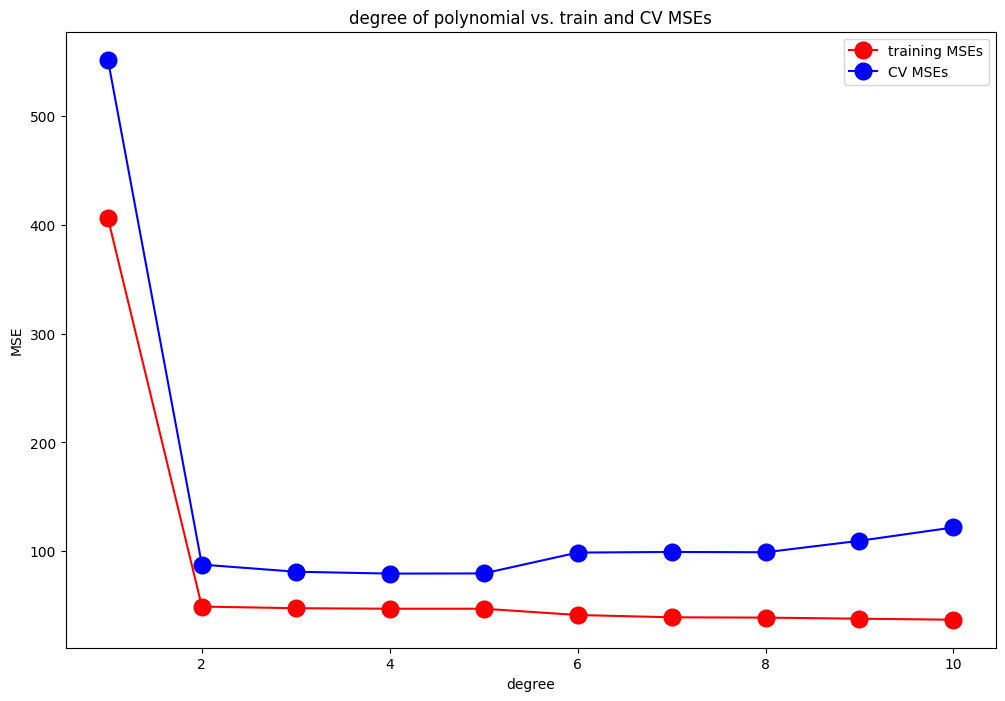

In [13]:
# Initialize lists to save the errors, models, and feature transforms
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Loop over 10 times. Each adding one more degree of polynomial higher than the last.
for degree in range(1,11):
    
    # Add polynomial features to the training set
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Scale the training set
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Compute the training MSE
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Add polynomial features and scale the cross validation set
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Compute the cross validation MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plot the results
degrees=range(1,11)
utils_08.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")

### Elegir el mejor modelo

Al seleccionar un modelo, debes elegir uno que tenga un buen desempeño tanto en el conjunto de entrenamiento como en el de validación cruzada. Esto implica que el modelo es capaz de aprender los patrones de tu conjunto de entrenamiento sin sobreajustarse.

Notarás una caída abrupta en el error de validación cruzada de los modelos con grado=1 a grado=2. Esto es seguido por una línea relativamente plana hasta grado=5. 

Sin embargo, después de ese punto, el error de validación cruzada generalmente empeora a medida que agregas más características polinomiales. Con base en esto, puedes decidir usar el modelo con el menor `cv_mse` como el más adecuado para tu aplicación.

In [14]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


Luego, puedes publicar el error de generalización calculando el MSE del conjunto de prueba. Como es habitual, debes transformar estos datos de la misma manera en que lo hiciste con los conjuntos de entrenamiento y validación cruzada.

In [15]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


## Redes Neuronales

El mismo proceso de selección de modelo también se puede usar al elegir entre diferentes arquitecturas de redes neuronales. En esta sección, crearás los modelos mostrados a continuación y los aplicarás a la misma tarea de regresión mencionada anteriormente.

<img src='images/08/nn_arch.png' width=40%>

### Preparar los Datos

Utilizarás los mismos conjuntos de entrenamiento, validación cruzada y prueba que generaste en la sección anterior. 
Como las redes neuronales pueden aprender relaciones no lineales, puedes optar por omitir la adición de características polinomiales. 

El código a continuación, el valor predeterminado de `degree` está establecido en `1` para indicar que solo se utilizarán `x_train`, `x_cv` y `x_test` tal cual están (es decir, sin características polinomiales adicionales). No obstante, puedes probar otros valores para incluir características polinomiales, y ver su efecto. 

In [16]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

A continuación, escalarás las características de entrada para ayudar a que el descenso de gradiente converja más rápido. 

>Nuevamente, ten en cuenta que estás utilizando la media y la desviación estándar calculadas a partir del conjunto de entrenamiento, utilizando solo `transform()` en los conjuntos de validación cruzada y prueba en lugar de `fit_transform()`.

In [17]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Construir y entrenar los modelos

Luego, crearemos las arquitecturas de redes neuronales mostradas anteriormente. El código que se encarga de eso está en la función `build_models()` en el archivo `utils_08.py` en caso de que quieras inspeccionarlo o modificarlo. Usaremos dicha función en el bucle a continuación y luego procederemos a entrenar los modelos. Para cada modelo, también registrarás los errores de entrenamiento y validación cruzada.

In [18]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = utils_08.build_models()

# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

Training model_1...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Training model_2...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Training model_3...
Done!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
RESULTS:
Model 1: Training MSE: 406.19, CV MSE: 551.78
Model 2: Training MSE: 75.39, CV MSE: 98.90
Model 3: Training MSE: 73.35, CV MSE: 112.28


A partir de los errores registrados, podrás decidir cuál es el mejor modelo para tu aplicación. Observa los resultados anteriores y verifica si estás de acuerdo con el `model_num` seleccionado a continuación. Finalmente, calcularás el error en el conjunto de prueba para estimar qué tan bien se generaliza a nuevos ejemplos.

In [22]:
# Select the model with the lowest CV MSE
model_num = 2

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Selected Model: 2
Training MSE: 75.39
Cross Validation MSE: 98.90
Test MSE: 112.12


## Clasificación

En esta última parte del laboratorio, evaluaremos y seleccionaremos modelos para una tarea de clasificación. El proceso será similar, con la principal diferencia en el cálculo de los errores.

### Cargar el Conjunto de Datos

Primero, cargarás un conjunto de datos para una tarea de clasificación binaria. Este conjunto tiene 200 ejemplos de dos características de entrada (`x1` y `x2`), y un objetivo `y` que puede ser `0` o `1`.

In [23]:
# Load the dataset from a text file
data = np.loadtxt('./data/data_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


Puedes graficar el conjunto de datos para examinar cómo se separan los ejemplos.

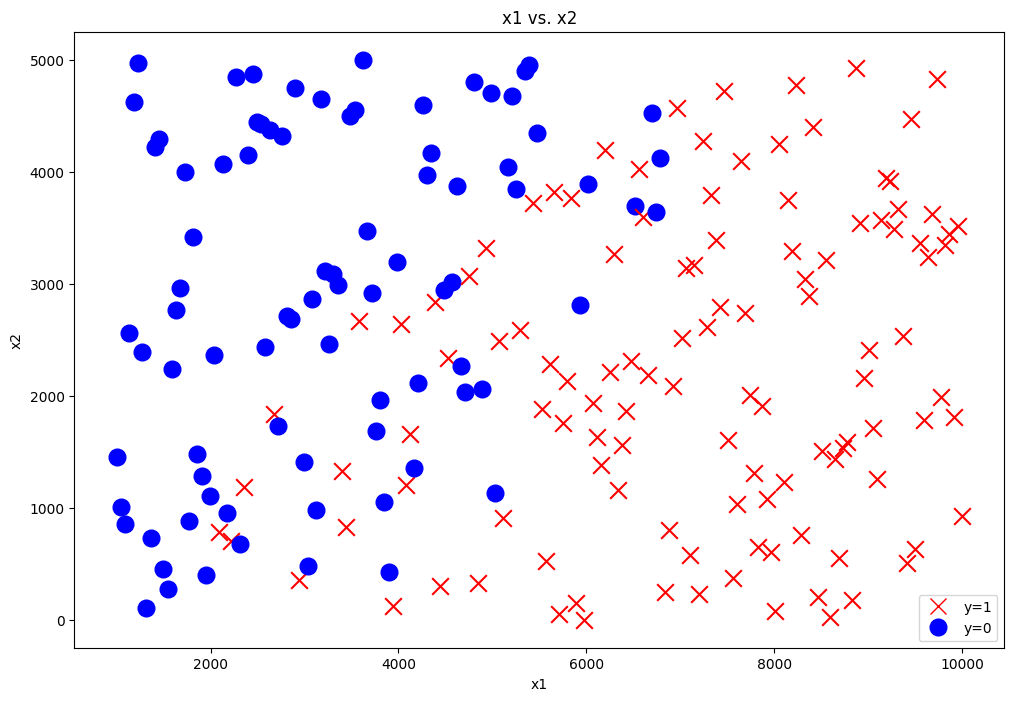

In [24]:
utils_08.plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

### Dividir y preparar el conjunto de datos

A continuación, generamos los conjuntos de entrenamiento, validación cruzada y prueba. Utilizamos las mismas proporciones *60/20/20* que antes. También escalaremos las características como hicimos en la sección anterior.

In [25]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [26]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

### Evaluar el error para modelos de clasificación

En las secciones anteriores sobre modelos de regresión, utilizaste el error cuadrático medio (MSE) para medir qué tan bien está funcionando tu modelo. 
Para clasificación, puedes obtener una métrica similar calculando la fracción de los datos que el modelo ha clasificado incorrectamente. 

Por ejemplo, si tu modelo hizo predicciones incorrectas para 2 muestras de un total de 5, entonces reportarás un error del `40%` o `0.4`. 

El código a continuación demuestra esto utilizando un bucle `for` y también con la función [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) de Numpy.

In [27]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        
        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


### Construir y entrenar el modelo

Utilizarás las mismas arquitecturas de redes neuronales de la sección anterior, por lo que podrás llamar nuevamente a la función `build_models()` para crear nuevas instancias de estos modelos.

Seguirás el enfoque recomendado, donde utilizas una activación `linear` para la capa de salida (en lugar de `sigmoid`) y luego configuras `from_logits=True` al declarar la función de pérdida del modelo. Utilizarás la [pérdida de entropía cruzada binaria](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) porque este es un problema de clasificación binaria.

Después de entrenar, usarás una [función sigmoide](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) para convertir las salidas del modelo en probabilidades. A partir de ahí, puedes establecer un umbral y obtener la fracción de ejemplos mal clasificados en los conjuntos de entrenamiento y validación cruzada.

Puedes ver todo esto en la celda de código a continuación.

In [28]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = utils_08.build_models()

# Loop over each model
for model in models_bc:
    
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Training model_2...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training model_3...
Done!

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Model 1: Training Set Classification Error: 0.05000, CV Set Classification Error: 0.15000
Model 2: Training Set Classification Error: 0.05833, CV Set Classification Error: 0.17500
Model 3: Training Set Classification Error: 0.10833, CV Set Classification Error: 0.17500


A partir del resultado anterior, puedes elegir cuál fue el que mejor rendimiento tuvo. Si hay un empate en el error del conjunto de validación cruzada, puedes agregar otro criterio para desempatar. Por ejemplo, podrías elegir el modelo con un menor error de entrenamiento. Un enfoque más común es elegir el modelo más pequeño, ya que ahorra recursos computacionales. En nuestro ejemplo, el Modelo 1 es el más pequeño y el Modelo 3 es el más grande.

Finalmente, puedes calcular el error en el conjunto de prueba para reportar el error de generalización del modelo.

In [32]:
# Select the model with the lowest error
model_num = 1

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Selected Model: 1
Training Set Classification Error: 0.0500
CV Set Classification Error: 0.1500
Test Set Classification Error: 0.1500


## Resumen

En este laboratorio, practicaste la evaluación del rendimiento de un modelo y la selección entre diferentes configuraciones de modelos. Dividiste tus conjuntos de datos en conjuntos de **entrenamiento**, **validación cruzada** y **prueba**, y viste cómo se usan cada uno de estos en aplicaciones de machine learning.

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/patok/intro-ML/blob/main/08_01-cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>